In [1]:
#Importing libraries for Linear Regression model

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
cars = pd.read_csv("car data.csv")



This is Vehicle dataset from cardekho Dataset . This dataset contains information about used cars listed on website cardekho.com. We are going to use for finding predictions of price with the use of regression models.

The datasets consist of several independent variables include:

Car_Name : This column should be filled with the name of the car.

Year : This column should be filled with the year in which the car was bought.

Selling_Price : This column should be filled with the price the owner wants to sell the car at.

Present_Price : This is the current ex-showroom price of the car.

Kms_Driven : This is the distance completed by the car in km.

Fuel_Type : Fuel type of the car i.e Diesel,Petrol,CNG

Seller_Type : Defines whether the seller is a dealer or an individual.

Transmission : Defines whether the car is manual or automatic.

Owner : Defines the number of owners the car has previously had.


In [4]:
cars.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [5]:
# Checking Shape 
cars.shape

(301, 9)

In [6]:
# There are 301 rows and 9 columns

In [7]:
#Checking 5 point summary
cars.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,301.0,2013.627907,2.891554,2003.00,2012.0,2014.0,2016.0,2018.0
Selling_Price,301.0,4.661296,5.082812,0.10,0.9,3.6,6.0,35.0
Present_Price,301.0,7.628472,8.644115,0.32,1.2,6.4,9.9,92.6
Kms_Driven,301.0,36947.205980,38886.883882,500.00,15000.0,32000.0,48767.0,500000.0
Owner,301.0,0.043189,0.247915,0.00,0.0,0.0,0.0,3.0


In [8]:
# checking data types
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


There are 4 continuous values( 2 float, 2 integer) and 4 categorical values

In [9]:
#checking null values
cars.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

There are no null values

In this regression model the dependent variable will be 'Selling_price' rest all the variables will be considered as independent variables

For buliding linear regression model we need all numerical variables,so the features containing object datatype are either converted or dropped

In [10]:
cars.Car_Name.value_counts()

city                26
corolla altis       16
verna               14
fortuner            11
brio                10
                    ..
Hero Hunk            1
Honda CB Trigger     1
s cross              1
Honda CB Unicorn     1
ignis                1
Name: Car_Name, Length: 98, dtype: int64



Car_Name contains 98 different values so it is better to drop this column


In [11]:
cars.drop(['Car_Name'],axis=1,inplace = True)

In [12]:
cars.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [13]:
cars.tail()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
296,2016,9.50,11.6,33988,Diesel,Dealer,Manual,0
297,2015,4.00,5.9,60000,Petrol,Dealer,Manual,0
298,2009,3.35,11.0,87934,Petrol,Dealer,Manual,0
299,2017,11.50,12.5,9000,Diesel,Dealer,Manual,0
300,2016,5.30,5.9,5464,Petrol,Dealer,Manual,0


# Eda

## Univariate Analysis

<AxesSubplot:>

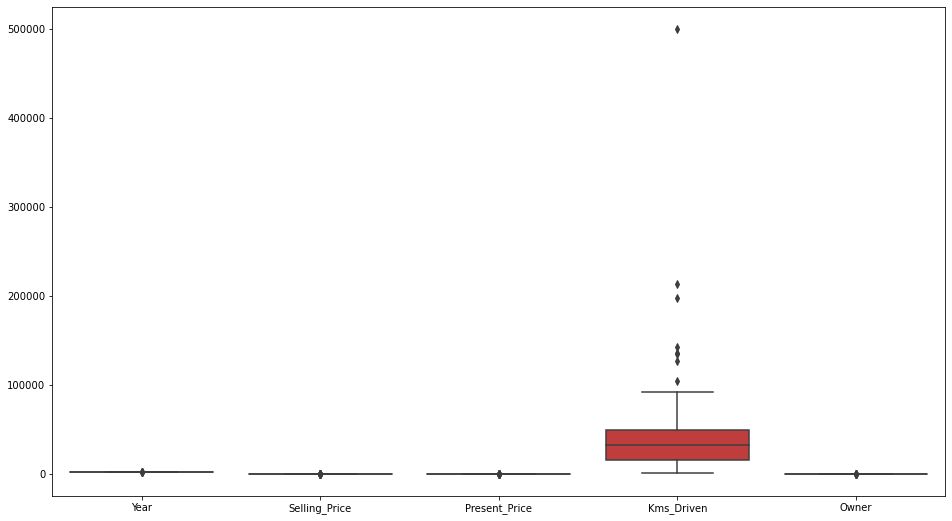

In [14]:
plt.figure(figsize=(16,9))
sns.boxplot(data=cars)

In [15]:
# We observed that kms_Driven has outliers

In [16]:
# Other OUTLIERS ALSO PRESENT but they are not due to anomaly 

In [17]:
q1=cars['Kms_Driven'].quantile(0.25)
q3=cars['Kms_Driven'].quantile(0.75)
iqr=q3-q1

In [18]:
UL = q3 + (1.5 * iqr)
LL = q1 - (1.5 * iqr)
print(iqr , UL ,  LL)

33767.0 99417.5 -35650.5


In [19]:
cars[cars['Kms_Driven']>UL]

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
37,2003,0.35,2.28,127000,Petrol,Individual,Manual,0
50,2012,14.90,30.61,104707,Diesel,Dealer,Automatic,0
53,2013,16.00,30.61,135000,Diesel,Individual,Automatic,0
77,2004,1.50,12.35,135154,Petrol,Dealer,Automatic,0
84,2005,3.49,13.46,197176,Diesel,Dealer,Manual,0
85,2006,2.50,23.73,142000,Petrol,Individual,Automatic,3
179,2010,0.31,1.05,213000,Petrol,Individual,Manual,0
196,2008,0.17,0.52,500000,Petrol,Individual,Automatic,0


In [20]:
cars[cars['Kms_Driven']>UL].count()['Kms_Driven']

8



These 8 values are greater than the upper limit value 99417.5

We would remove these values


In [21]:
df = cars[cars['Kms_Driven']<UL]
cars=df
cars

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...
296,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


<AxesSubplot:xlabel='Year', ylabel='Count'>

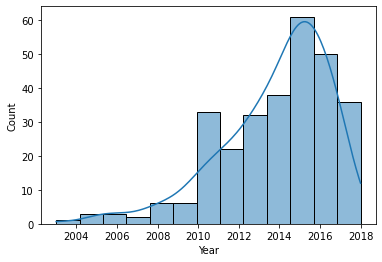

In [22]:


sns.histplot(df['Year'],kde=True)

In [23]:
# The Year variable is left skewed

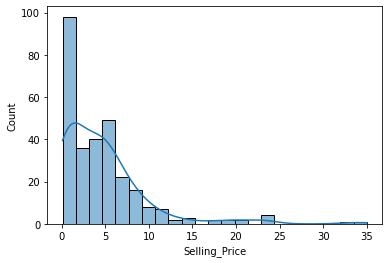

In [24]:
sns.histplot(df['Selling_Price'],kde=True)
plt.show()

In [25]:
# the Selling_Price is right skewed

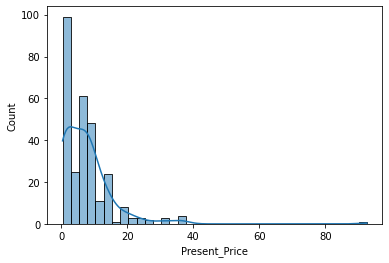

In [26]:
sns.histplot(df['Present_Price'],kde=True)
plt.show()

In [27]:
#the present_price is right skewed

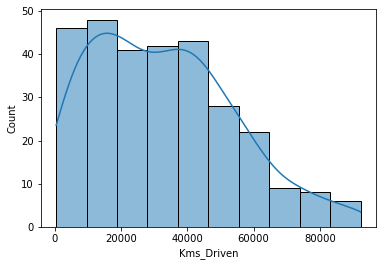

In [28]:
sns.histplot(df['Kms_Driven'],kde=True)
plt.show()

In [29]:
#The Kms_Driven are almost normally distributed after removing the outliers, the max values lie between 20000 to 50000
#kms

In [30]:
df['Kms_Driven'].skew()

0.5564869715666148

C:\Users\clive\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


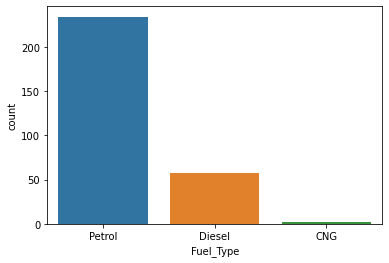

In [31]:
sns.countplot(cars['Fuel_Type'])
plt.show()

In [32]:
cars['Fuel_Type'].value_counts()

Petrol    234
Diesel     57
CNG         2
Name: Fuel_Type, dtype: int64

In [33]:
# From this bar plot we can see that there are three categories of Fuel_Type
#Petrol Fuel_type is the maximum in number and CNG cars are the least

C:\Users\clive\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


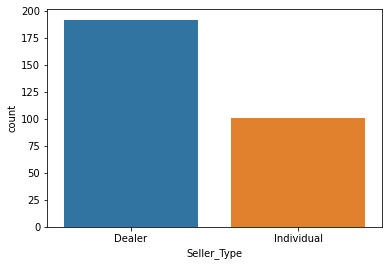

In [34]:
sns.countplot(cars['Seller_Type'])
plt.show()

In [35]:
# There are two types of sellers : Individual and Dealer
# The seller_type dealer is greater than the individual seller_type

C:\Users\clive\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


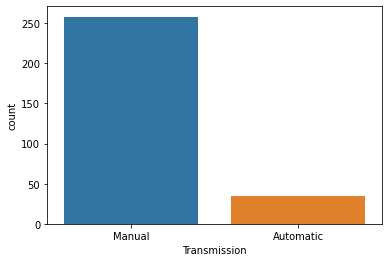

In [36]:
sns.countplot(cars['Transmission'])
plt.show()

In [37]:
 #The Transmission feature has 2 categories
#Manual are more in comparison to automatic

C:\Users\clive\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


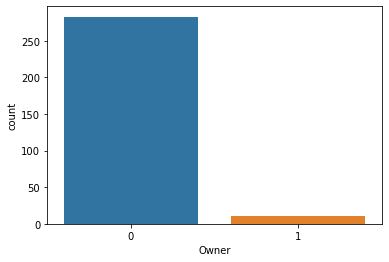

In [38]:
sns.countplot(cars['Owner'])
plt.show()

In [39]:
# The cars having 0 previous owners is more than the cars having one previous owner.

## Bivariate Analysis

<AxesSubplot:xlabel='Year', ylabel='Selling_Price'>

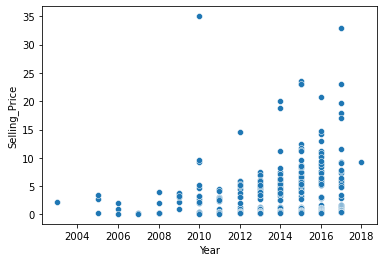

In [40]:
sns.scatterplot(x=cars.Year,y=cars.Selling_Price)

In [41]:
#The older the car the lesser the selling price

<AxesSubplot:xlabel='Present_Price', ylabel='Selling_Price'>

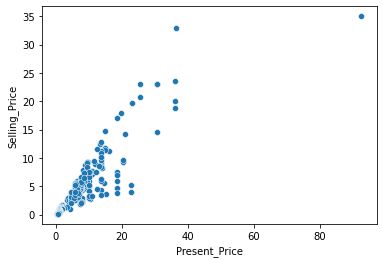

In [42]:
sns.scatterplot(x=cars.Present_Price,y=cars.Selling_Price)

The selling price of those cars is greater whose current ex-showroom price(present_price) is greater i.e the present_price and sellin_price is directly proportional.

<AxesSubplot:xlabel='Kms_Driven', ylabel='Selling_Price'>

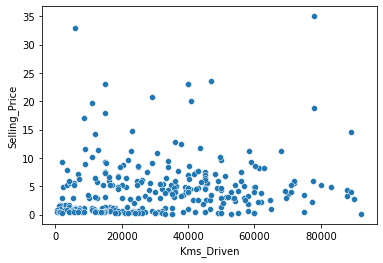

In [43]:
sns.scatterplot(x=cars['Kms_Driven'],y=cars['Selling_Price'])

In [44]:
#As the Km_Driven increases the Selling_price of the car decreases 

<AxesSubplot:xlabel='Fuel_Type', ylabel='Selling_Price'>

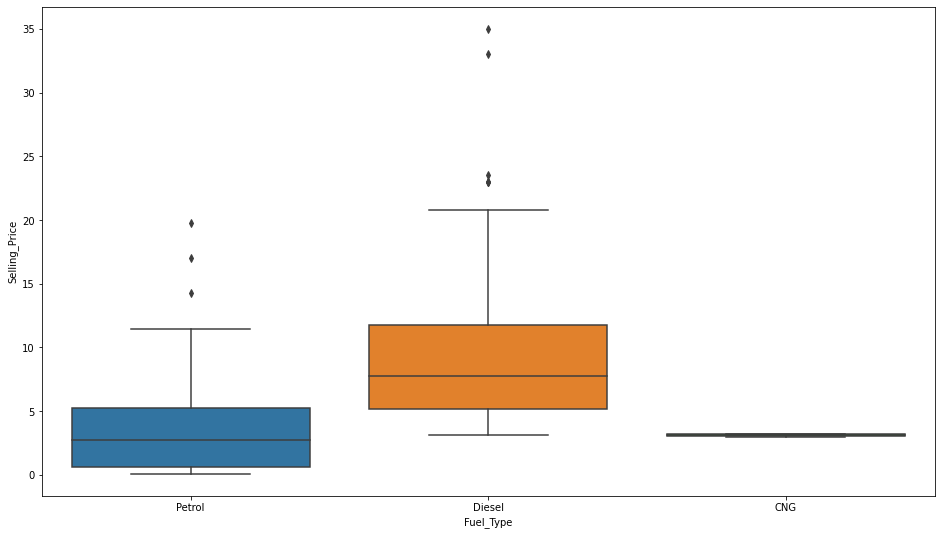

In [45]:
plt.figure(figsize=(16,9))

sns.boxplot(x=cars.Fuel_Type,y=cars.Selling_Price)

The Diesel cars are having the highest selling_price with most number of outliers being present. Diesel > CNG > Petrol in terms of seeling price

<AxesSubplot:xlabel='Transmission', ylabel='Selling_Price'>

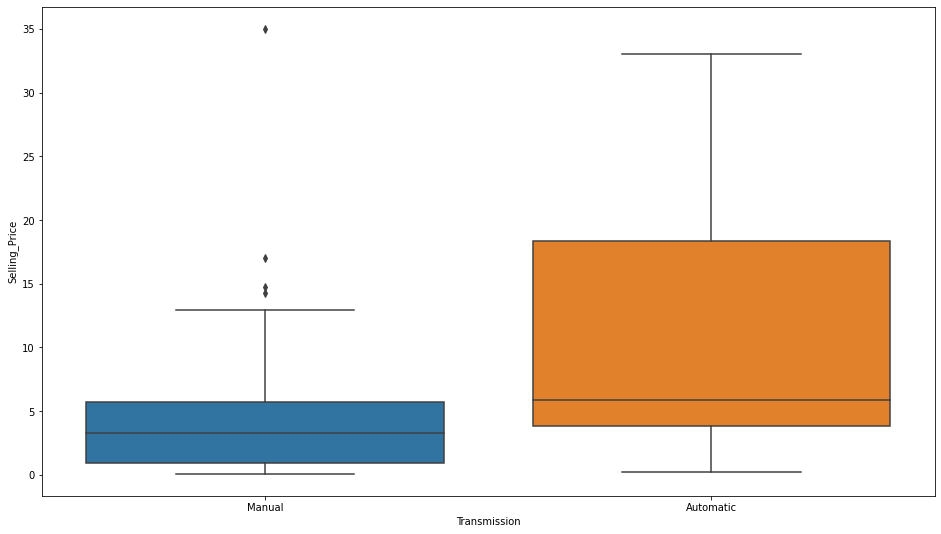

In [46]:
plt.figure(figsize=(16,9))
sns.boxplot(x=cars.Transmission,y=cars.Selling_Price)

In [47]:
#Automatic cars are expesnive than manual cars

<AxesSubplot:xlabel='Owner', ylabel='Selling_Price'>

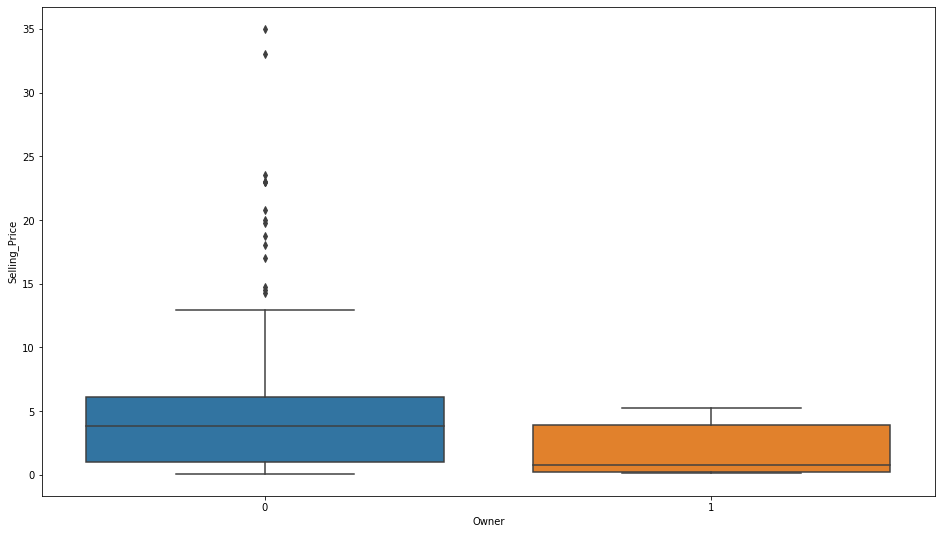

In [48]:
plt.figure(figsize=(16,9))

sns.boxplot(x=cars.Owner,y=cars.Selling_Price)

In [49]:
# The cars with no previous owner are expensive than with a previous owner.

<AxesSubplot:xlabel='Seller_Type', ylabel='Selling_Price'>

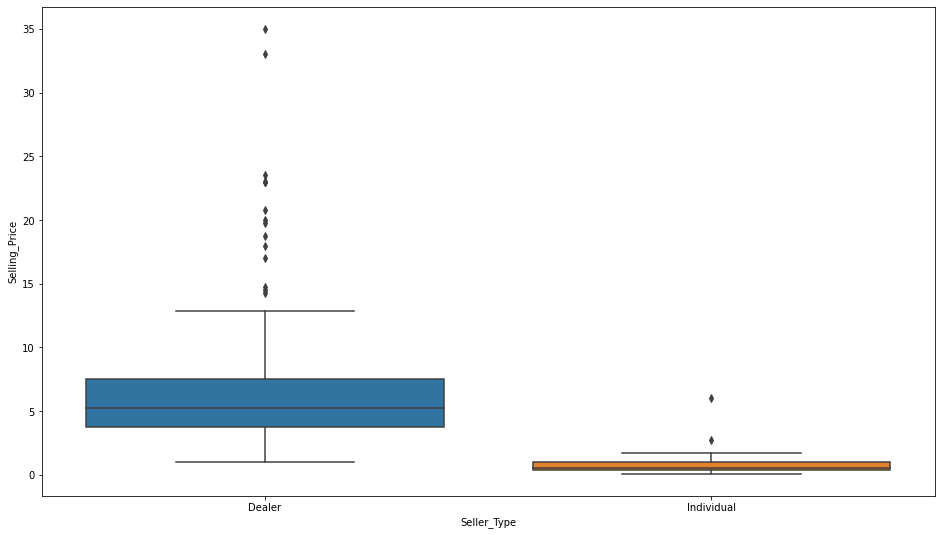

In [50]:
plt.figure(figsize=(16,9))

sns.boxplot(x=cars.Seller_Type,y=cars.Selling_Price)

In [51]:
#Individuals are selling there cars at lesser price than the cars being sold by the dealers

## Multivariate Analysis


In [52]:
cars.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


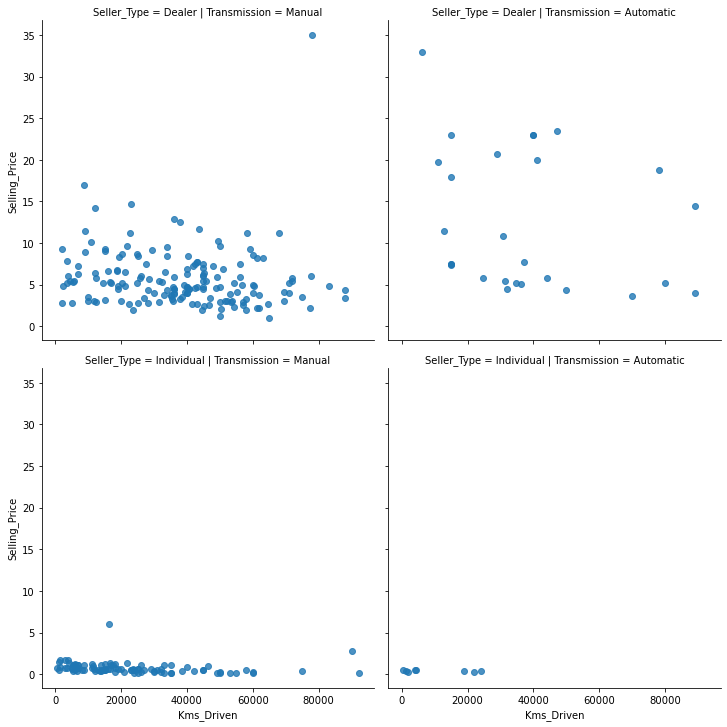

In [53]:
sns.lmplot(x='Kms_Driven',y='Selling_Price',data=cars,fit_reg=False,col='Transmission',row='Seller_Type')

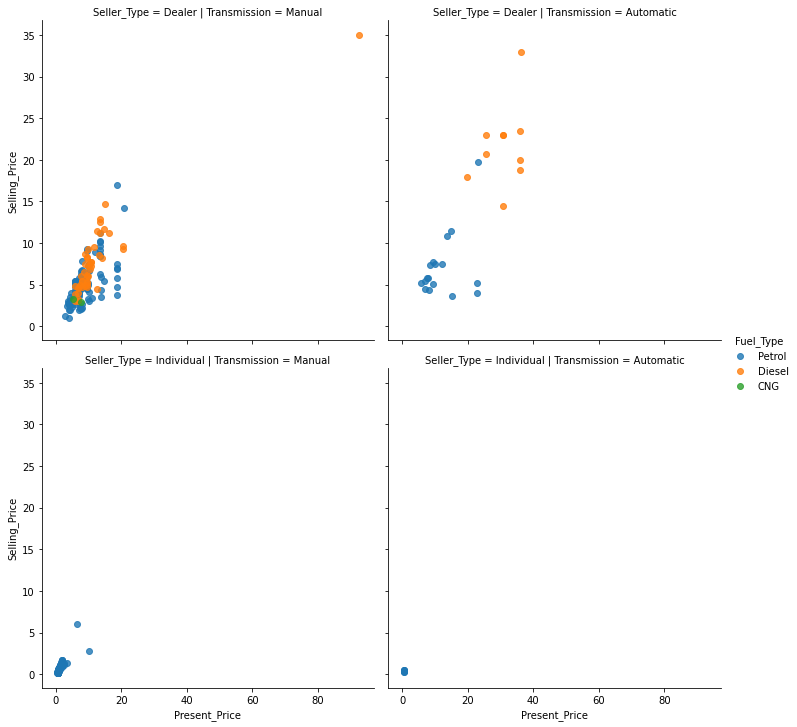

In [54]:
sns.lmplot(x='Present_Price',y='Selling_Price',data=cars,fit_reg=False,col='Transmission',row='Seller_Type',hue='Fuel_Type')   



1.    All the individual seller_type are having only petrol cars.
2.   Dealers selling manual transmission cars are selling all the 3 types of fuel cars, most expensive being the diesel cars



## Converting categorical variables to dummy variables


In [55]:
cars = pd.get_dummies(cars,columns=['Fuel_Type','Seller_Type','Transmission'],drop_first=True)

In [56]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 293 entries, 0 to 300
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Year                    293 non-null    int64  
 1   Selling_Price           293 non-null    float64
 2   Present_Price           293 non-null    float64
 3   Kms_Driven              293 non-null    int64  
 4   Owner                   293 non-null    int64  
 5   Fuel_Type_Diesel        293 non-null    uint8  
 6   Fuel_Type_Petrol        293 non-null    uint8  
 7   Seller_Type_Individual  293 non-null    uint8  
 8   Transmission_Manual     293 non-null    uint8  
dtypes: float64(2), int64(3), uint8(4)
memory usage: 23.0 KB


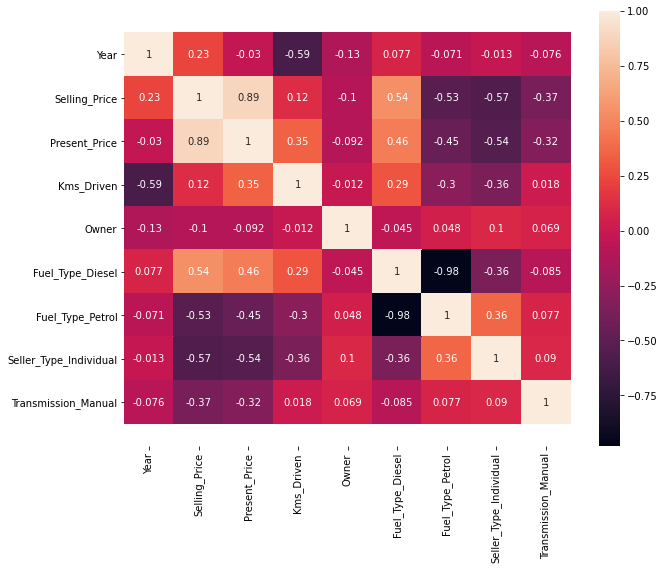

In [57]:
#Heatmap to show the correlation between various variables of the dataset

plt.figure(figsize=(10, 8))
cor = cars.corr()
ax = sns.heatmap(cor,annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()





The target variable Selling Price is highly correlated with:

1.   Present Price
2.    Fuel Type
3.   Seller Type



Linear Regression Model

The simplest form of regression is the linear regression, which assumes that the predictors have a linear relationship with the target variable.

The linear regression equation can be expressed in the following form:

y = a1x1 + a2x2 + a3x3 + ..... + anxn + b

where
y is the target variable.
x1, x2, x3,...xn are the features.
a1, a2, a3,..., an are the coefficients.
b is the parameter of the model.


In [58]:
y=cars['Selling_Price']
X=cars.drop(['Selling_Price'],axis=1)

In [59]:
# Now we willl split the data set into two parts
#Train split
#Test split

In [60]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=1)

In [61]:
print(X_train.shape,X_test.shape)
print(y_train.shape,y_test.shape)

(219, 8) (74, 8)
(219,) (74,)


In [62]:
# Standardization of Data
from sklearn.preprocessing import StandardScaler
SS=StandardScaler()
X_train=SS.fit_transform(X_train)
X_train=pd.DataFrame(X_train,columns=X.columns)

X_test=SS.fit_transform(X_test)
X_test=pd.DataFrame(X_test,columns=X.columns)

In [63]:
X_train

,Year,Present_Price,Kms_Driven,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,0.097912,0.043234,0.586112,-0.181711,2.052873,-2.023122,-0.692625,0.358979
1,0.097912,-0.796198,-0.648328,-0.181711,-0.487122,0.494286,1.443782,-2.785678
2,-1.433715,0.248083,0.253763,-0.181711,-0.487122,0.494286,-0.692625,0.358979
3,0.480819,-0.690434,-0.315979,-0.181711,-0.487122,0.494286,1.443782,0.358979
4,0.480819,-0.818464,0.111328,-0.181711,-0.487122,0.494286,1.443782,0.358979
...,...,...,...,...,...,...,...,...
214,0.480819,0.792489,0.516556,-0.181711,2.052873,-2.023122,-0.692625,0.358979
215,0.863726,0.003155,-0.790669,-0.181711,-0.487122,0.494286,-0.692625,0.358979
216,0.480819,-0.097042,0.158806,-0.181711,-0.487122,0.494286,-0.692625,0.358979
217,0.863726,-0.007978,-1.218070,-0.181711,-0.487122,0.494286,-0.692625,0.358979


In [64]:
X_test

,Year,Present_Price,Kms_Driven,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,0.715070,-0.898391,-0.788823,-0.205557,-0.504219,0.525226,1.211060,0.395285
1,0.369219,1.037843,-0.350663,-0.205557,-0.504219,0.525226,-0.825723,0.395285
2,0.715070,-0.944021,-0.386431,-0.205557,-0.504219,0.525226,1.211060,-2.529822
3,0.023368,0.026377,0.552484,-0.205557,1.983263,-1.903943,-0.825723,0.395285
4,-0.322483,-0.807131,0.015961,-0.205557,-0.504219,0.525226,1.211060,0.395285
...,...,...,...,...,...,...,...,...
69,-3.780993,0.183040,1.312558,-0.205557,-0.504219,0.525226,-0.825723,0.395285
70,0.369219,-0.133328,-0.812743,-0.205557,-0.504219,0.525226,-0.825723,0.395285
71,1.060921,-0.898391,-1.325346,-0.205557,-0.504219,0.525226,1.211060,0.395285
72,0.715070,-0.122681,-1.209100,-0.205557,-0.504219,0.525226,-0.825723,0.395285


In [65]:
#Building model using sklearn(Gradient Descent)
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train) # training the algorithmreg=LinearRegression()


LinearRegression()

In [66]:
# Getting the coefficients and intercept

print('coefficients:\n', lin_reg.coef_)
print('\n intercept:', lin_reg.intercept_)

coefficients:
 [ 0.79486733  3.94328611 -0.77671659  0.10827012  0.94642287  0.09942829
 -0.80175165 -0.65018428]

 intercept: 4.754748858447514


In [67]:
#Now predicting on the test data

y_pred = lin_reg.predict(X_test)

In [68]:
# compare the actual output values for X_test with the predicted values

df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df.reset_index(inplace=True,drop=True)
df


,Actual,Predicted
0,0.60,0.717997
1,8.65,9.370884
2,0.35,2.127379
3,4.75,6.518673
4,1.10,-0.371945
...,...,...
69,2.25,1.409433
70,5.25,5.111528
71,0.80,1.409629
72,5.50,5.736275


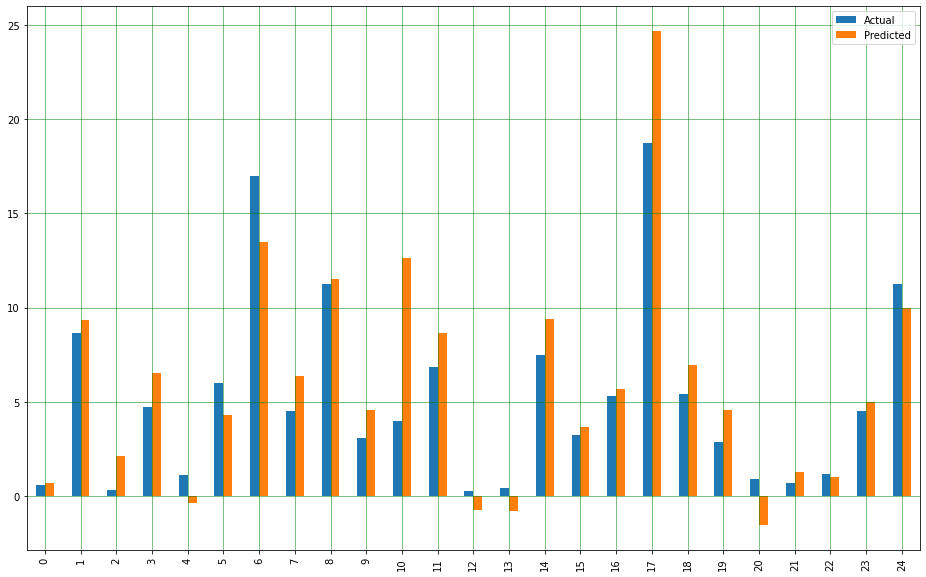

In [69]:
#Showing the difference between the actual and predicted value

df1 = df.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [70]:
#Calculating the accuracy 

from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

print('r2_score:', metrics.r2_score(y_test,y_pred))

Mean Absolute Error: 1.3319025779314535
Mean Squared Error: 3.6390573069014813
Root Mean Squared Error: 1.9076313341160764
r2_score: 0.8055675488485939


In [71]:
# Building a linear Regression model using statsmodels (OLS)

In [72]:
import warnings 
warnings.filterwarnings('ignore')
import statsmodels.api as sm

y = cars['Selling_Price']
X = cars.drop(['Selling_Price'],axis=1)
X_constant = sm.add_constant(X)
model = sm.OLS(y, X_constant).fit()
predictions = model.predict(X_constant)
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:          Selling_Price   R-squared:                       0.895
Model:                            OLS   Adj. R-squared:                  0.892
Method:                 Least Squares   F-statistic:                     301.8
Date:                Tue, 28 Jun 2022   Prob (F-statistic):          5.17e-134
Time:                        16:29:09   Log-Likelihood:                -559.84
No. Observations:                 293   AIC:                             1138.
Df Residuals:                     284   BIC:                             1171.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                   -542


Assumptions

For Linear Regression, we need to check if the 5 major assumptions hold.

    No Auto correlation
    Linearity of variables
    Normality of error terms
    No Heteroscedacity
    No strong MultiCollinearity



In [73]:

#Assumption 1- No autocorrelation


In [74]:
# 1. Durbin Watson Test

#Ho: Linear Regression Residuals are not correlated
#H1: Errors are correlated.

from statsmodels.stats.api import durbin_watson
durbin_watson(model.resid)

1.9066241806856394



From summary also we can see the durbin watson value ,this is v close to 2 which indicates no autocorrelation


In [75]:

#Assumption 2- Normality of Residuals


In [76]:
#1. Jarque berua test

from scipy import stats
print(stats.jarque_bera(model.resid))

#ho : the data is normally distributed
#h1: the errors are not normally distributed

Jarque_beraResult(statistic=609.8115535568984, pvalue=0.0)


In [77]:


#pvalue (0) < alpha (0.05) so we reject the null hypothesis the errors are not normally distributed


<AxesSubplot:ylabel='Density'>

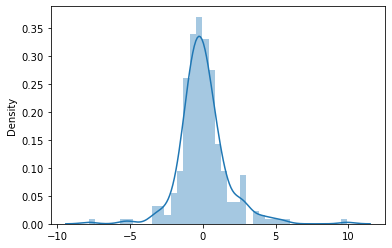

In [78]:
#2. Histogram

import seaborn as sns

sns.distplot(model.resid)

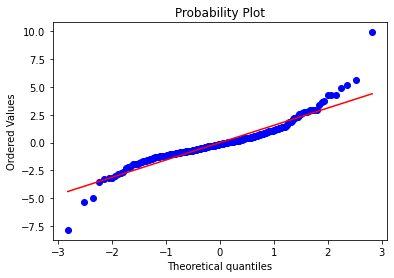

In [79]:
#3. QQ plot

import pylab

stats.probplot(model.resid, dist = 'norm', plot = pylab)
plt.show()

In [80]:
#4. shapiro wilk test

# Ho: The Data / Errors are Normal in Nature
# H1: The Data is not Normal

from scipy.stats import shapiro

teststats, pvalue = shapiro(model.resid)
print(pvalue)
print("reject the null ho")

4.787068636456782e-13
reject the null ho


In [81]:

#Asssumption 3 - Linearity of residuals


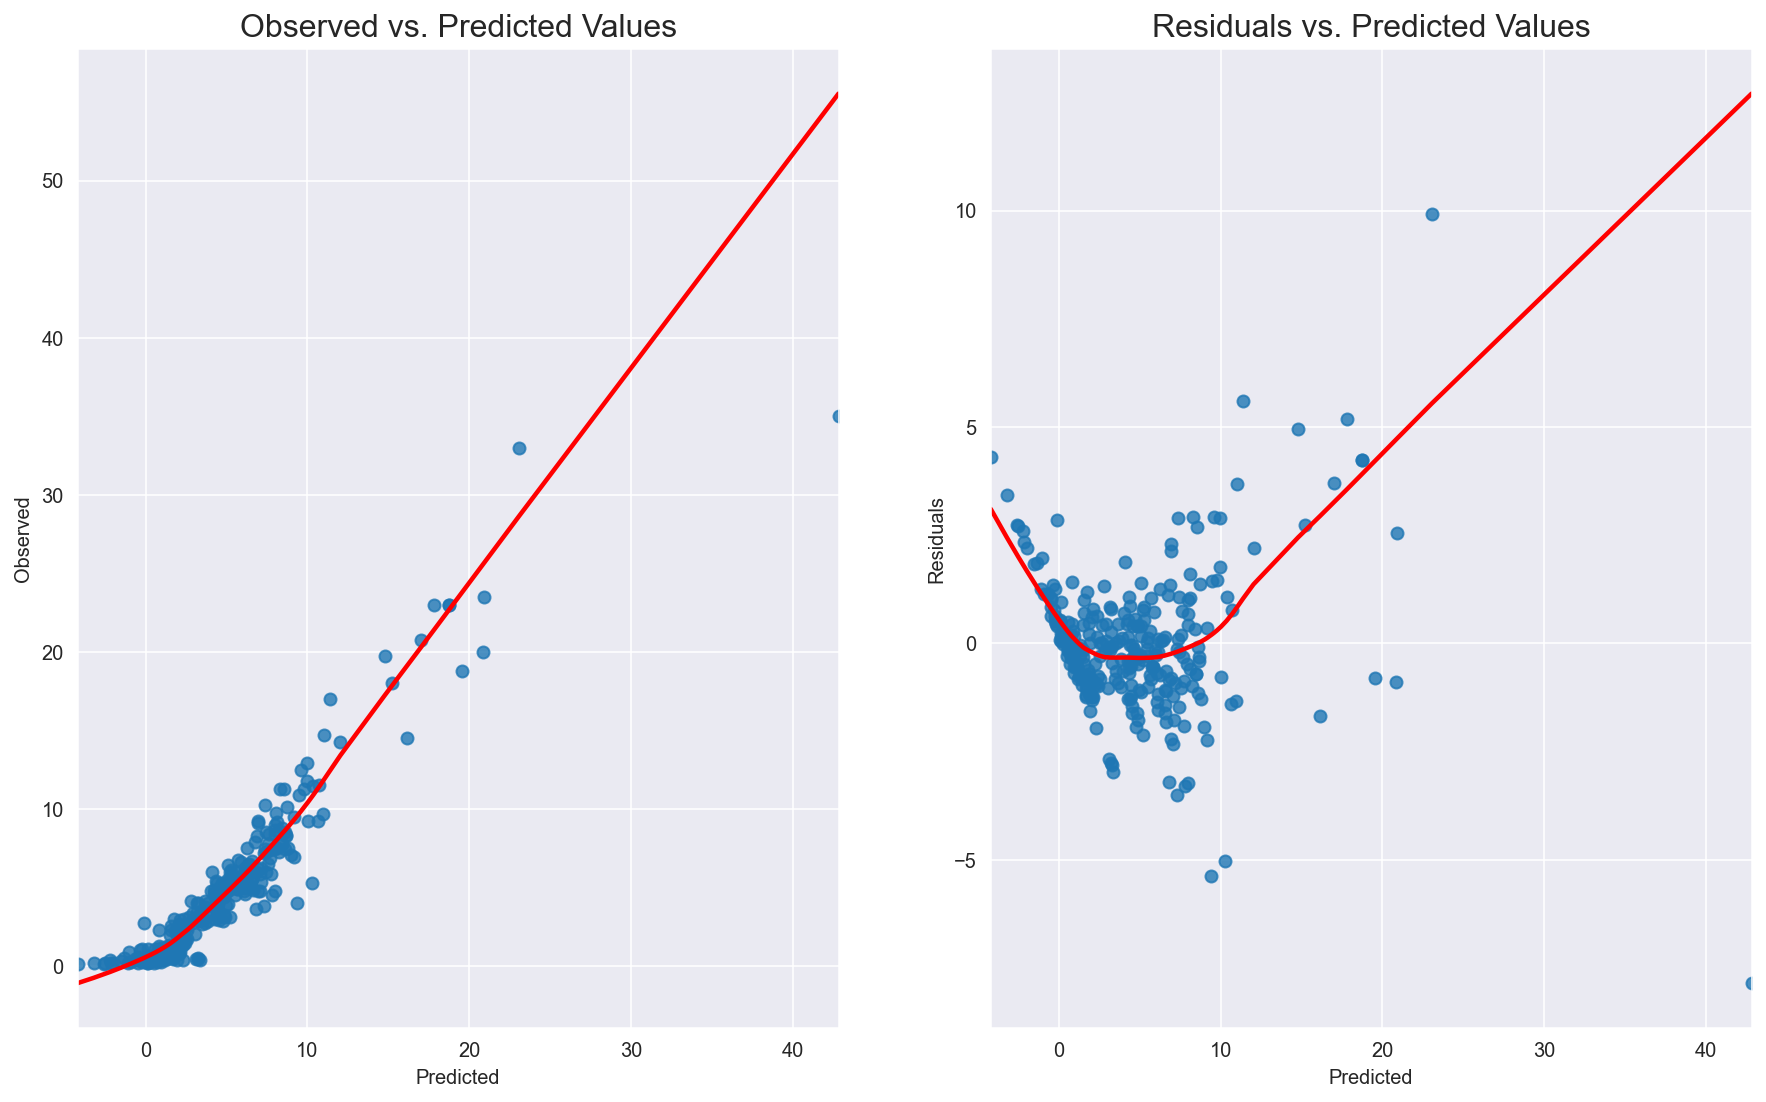

In [82]:
#1. Visual representation

%matplotlib inline
%config InlineBackend.figure_format ='retina'
import statsmodels.stats.api as sms
sns.set_style('darkgrid')
sns.mpl.rcParams['figure.figsize'] = (15.0, 9.0)

def linearity_test(model, y):
    '''
    Function for visually inspecting the assumption of linearity in a linear regression model.
    It plots observed vs. predicted values and residuals vs. predicted values.
    
    Args:
    * model - fitted OLS model from statsmodels
    * y - observed values
    '''
    fitted_vals = model.predict()
    resids = model.resid

    fig, ax = plt.subplots(1,2)
    
    sns.regplot(x=fitted_vals, y=y, lowess=True, ax=ax[0], line_kws={'color': 'red'})
    ax[0].set_title('Observed vs. Predicted Values', fontsize=16)
    ax[0].set(xlabel='Predicted', ylabel='Observed')
    
    #LOWESS (Locally Weighted Scatterplot Smoothing) is a popular tool used in regression analysis that creates a smooth line 
    #through a timeplot or scatter plot to help you to see relationship between variables and foresee trends.

    sns.regplot(x=fitted_vals, y=resids, lowess=True, ax=ax[1], line_kws={'color': 'red'})
    ax[1].set_title('Residuals vs. Predicted Values', fontsize=16)
    ax[1].set(xlabel='Predicted', ylabel='Residuals')
    
linearity_test(model, y)

In [83]:
#2. Rainbow test

import statsmodels.api as sm
sm.stats.linear_rainbow(res=model, frac=0.5)
# frac : we are not checking the whole data we are just checking the fraction of it

(1.2020762277949437, 0.13731368022962434)

In [84]:
#
#Assumption 4 - Homoscedasticity_test


In [85]:
from statsmodels.stats.api import het_goldfeldquandt
from statsmodels.compat import lzip

#1. Goldfeld Quandt Test:

# Ho: The residuals are not heteroscedastic / same variance / homoscedastic
# H1: The residuals are Heteroscedastic / unequal variance

name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(model.resid, model.model.exog)
lzip(name, test)

#exog - x varibles and endog - y variables



[('F statistic', 0.2596416760264985), ('p-value', 0.9999999999999876)]

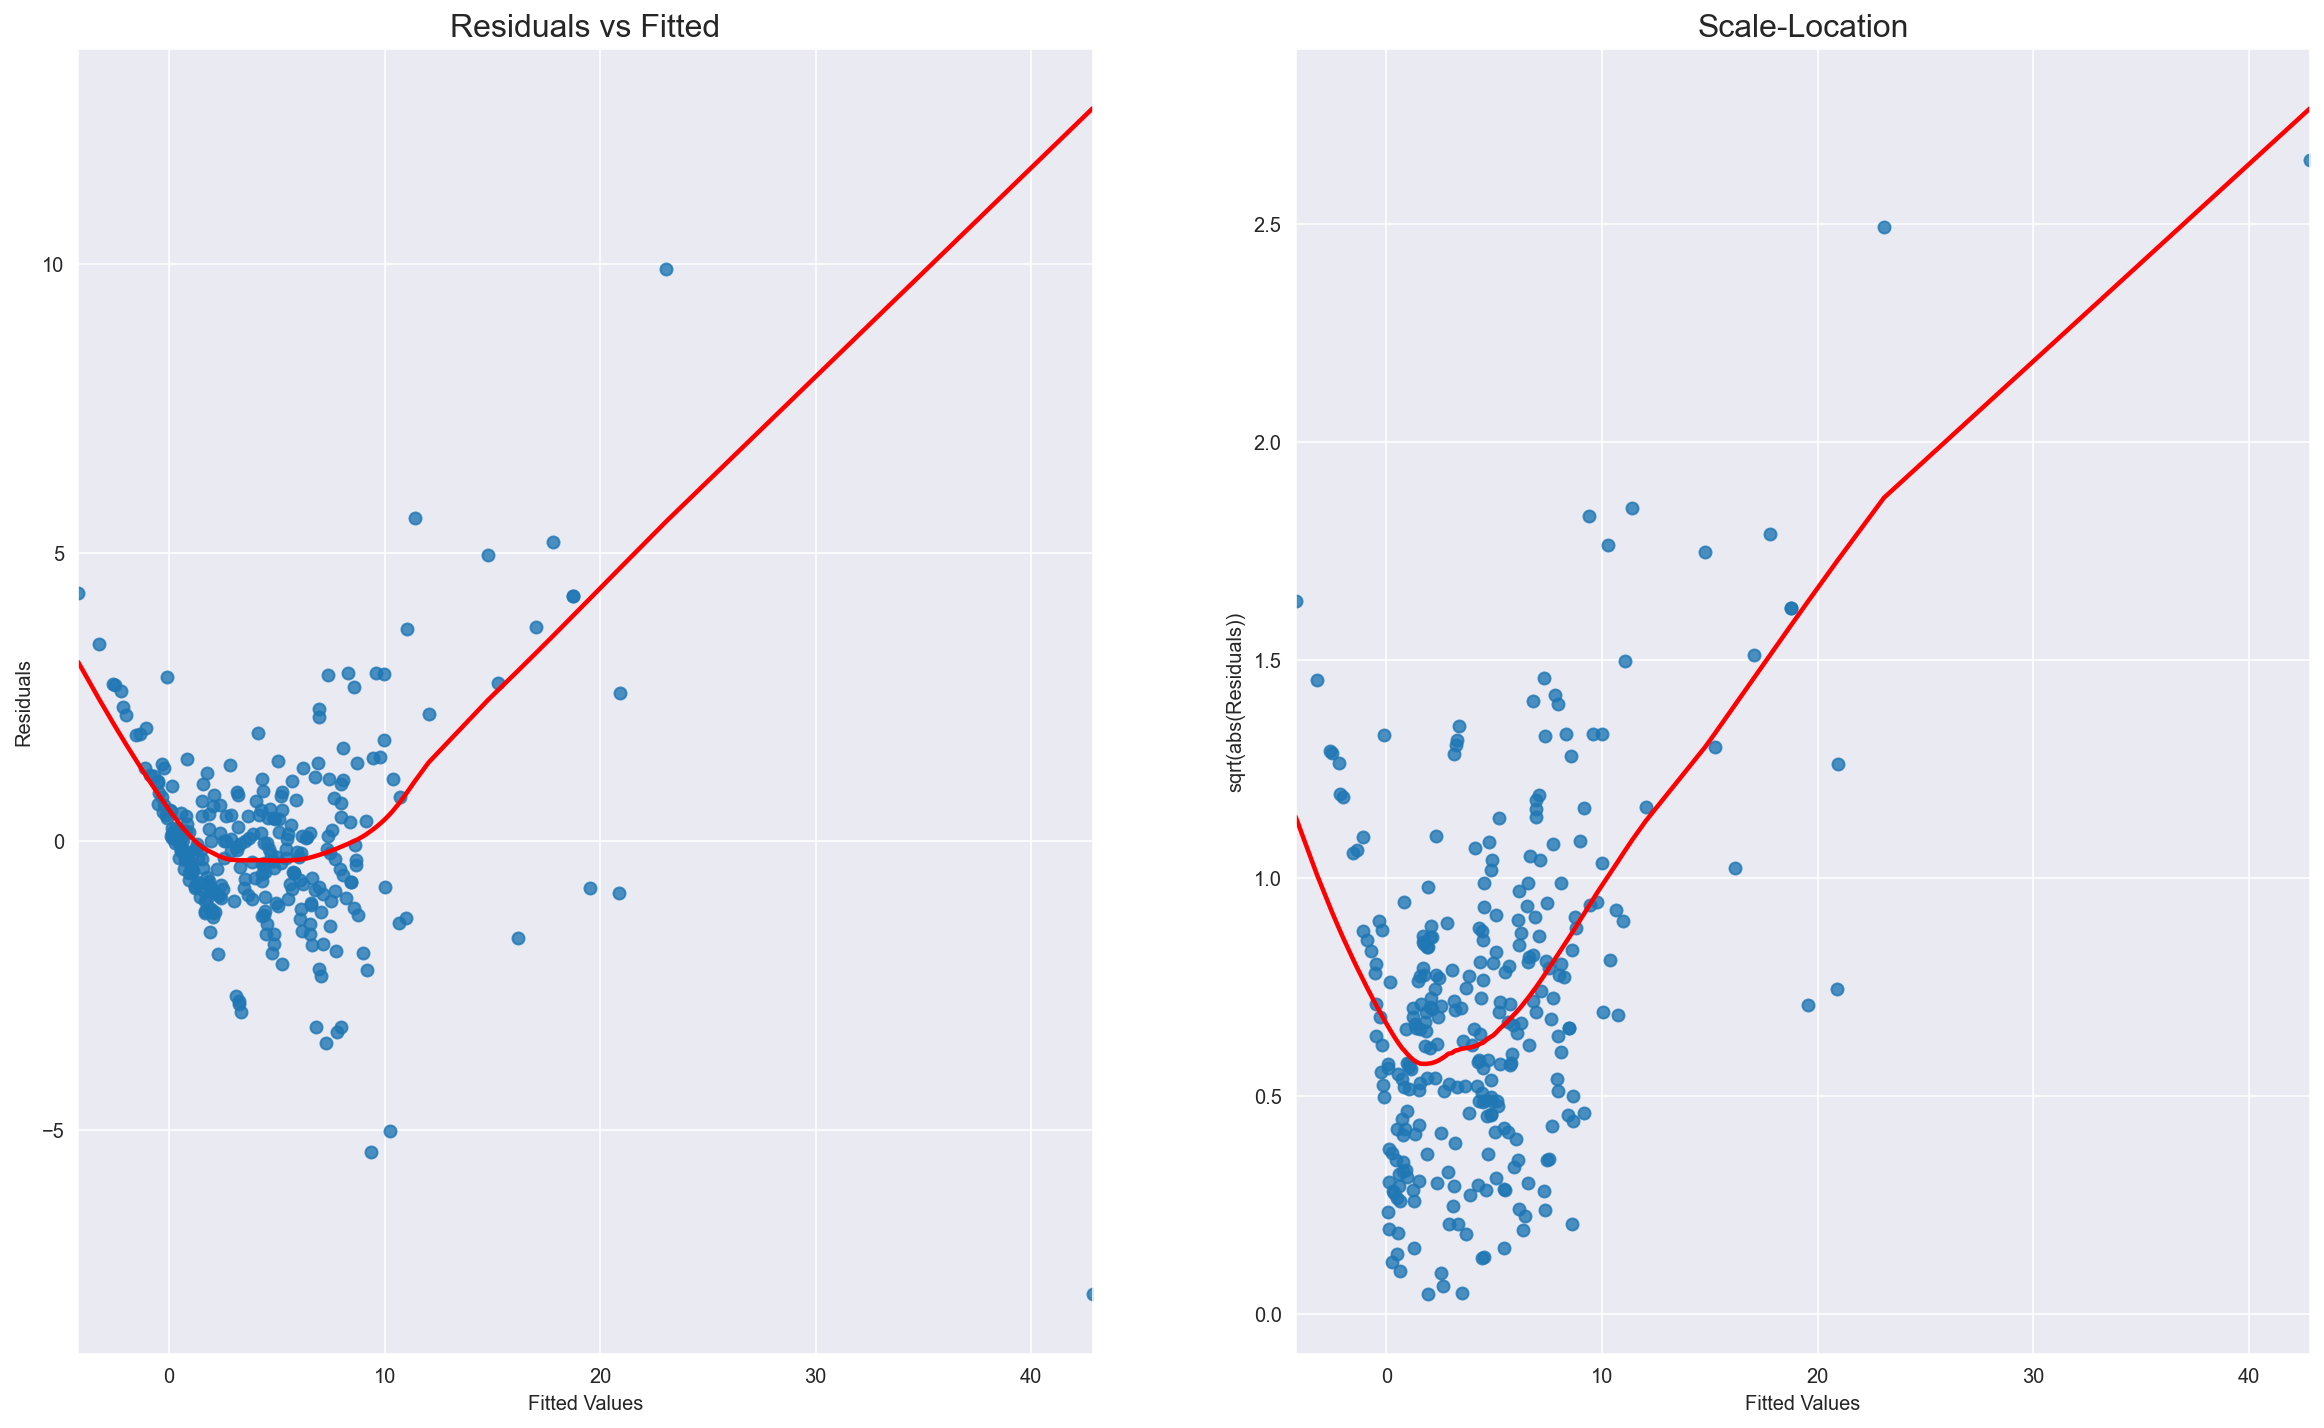

In [86]:
#2. Visual representation

fitted_vals = model.predict()
resids = model.resid
resids_standardized = model.get_influence().resid_studentized_internal
fig, ax = plt.subplots(1,2,figsize=(20,12))

sns.regplot(x=fitted_vals, y=resids, lowess=True, ax=ax[0], line_kws={'color': 'red'})
ax[0].set_title('Residuals vs Fitted', fontsize=16)
ax[0].set(xlabel='Fitted Values', ylabel='Residuals')

sns.regplot(x=fitted_vals, y=np.sqrt(np.abs(resids_standardized)), lowess=True, ax=ax[1], line_kws={'color': 'red'})
ax[1].set_title('Scale-Location', fontsize=16)
ax[1].set(xlabel='Fitted Values', ylabel='sqrt(abs(Residuals))')

plt.show()



In [87]:

#Assumption 5- NO MULTI COLLINEARITY


In [88]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [89]:
vif=[variance_inflation_factor(X_constant.values,i) for i in range(X_constant.shape[1])]
df=pd.DataFrame({'vif':vif[1:]},index=X.columns)

In [90]:
df

,vif
Year,1.855344
Present_Price,1.837928
Kms_Driven,2.202238
Owner,1.036110
Fuel_Type_Diesel,24.128242
Fuel_Type_Petrol,23.982198
Seller_Type_Individual,1.583834
Transmission_Manual,1.146456


In [91]:
df[df.vif>5].index

Index(['Fuel_Type_Diesel', 'Fuel_Type_Petrol'], dtype='object')

In [92]:
## After removing multicollinear feature 'Fuel_Type_Diesel'....cars1
cars1 = cars
cars1.drop(['Fuel_Type_Diesel'],axis=1,inplace=True)

X_vif = cars1.drop(['Selling_Price'],axis=1)
y_vif = cars1['Selling_Price']
from sklearn.linear_model import LinearRegression

lin_reg_vif = LinearRegression()
lin_reg_vif.fit(X, y)

print(f'Coefficients: {lin_reg_vif.coef_}')
print(f'Intercept: {lin_reg_vif.intercept_}')
print(f'R^2 score: {lin_reg_vif.score(X, y)}')

Coefficients: [ 2.71256264e-01  4.55618331e-01 -3.59343507e-05  3.90606193e-01
  2.55936877e+00  4.16137467e-01 -1.46936499e+00 -1.42713508e+00]
Intercept: -542.8983588010782
R^2 score: 0.8947414796898798


In [93]:
## After removing multicollinear feature 'Fuel_Type_Diesel'

import warnings 
warnings.filterwarnings('ignore')
import statsmodels.api as sm

X = cars1.drop(['Selling_Price'],axis=1)
y = cars1['Selling_Price']

X_constant = sm.add_constant(X)
model = sm.OLS(y,X_constant).fit()
predictions = model.predict(X_constant)
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:          Selling_Price   R-squared:                       0.893
Model:                            OLS   Adj. R-squared:                  0.890
Method:                 Least Squares   F-statistic:                     340.0
Date:                Tue, 28 Jun 2022   Prob (F-statistic):          2.53e-134
Time:                        16:29:10   Log-Likelihood:                -562.15
No. Observations:                 293   AIC:                             1140.
Df Residuals:                     285   BIC:                             1170.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                   -552

In [94]:
vif = [variance_inflation_factor(X_constant.values, i) for i in range(X_constant.shape[1])]
pd.DataFrame({'vif': vif[1:]}, index=X.columns).T

,Year,Present_Price,Kms_Driven,Owner,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
vif,1.849134,1.820427,2.199469,1.035645,1.395078,1.578919,1.146367


In [95]:
# noramlity criteria were failing , transformation is needed 

In [96]:
## for sqrt(X)

final_df = np.sqrt(cars1)
final_df.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,44.877611,1.830301,2.364318,164.316767,0.0,1.0,0.0,1.0
1,44.866469,2.179449,3.088689,207.364414,0.0,0.0,0.0,1.0
2,44.911023,2.692582,3.138471,83.066239,0.0,1.0,0.0,1.0
3,44.844175,1.688194,2.037155,72.111026,0.0,1.0,0.0,1.0
4,44.877611,2.144761,2.621068,206.033978,0.0,0.0,0.0,1.0


In [97]:
X_final = final_df.drop(['Selling_Price'],axis=1)
y_final = final_df.Selling_Price
X_constant_final = sm.add_constant(X_final)
model_final = sm.OLS(y_final, X_constant_final).fit()
predictions_final = model_final.predict(X_constant_final)
print(model_final.summary())

                            OLS Regression Results                            
Dep. Variable:          Selling_Price   R-squared:                       0.952
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                     804.0
Date:                Tue, 28 Jun 2022   Prob (F-statistic):          1.42e-183
Time:                        16:29:10   Log-Likelihood:                 16.484
No. Observations:                 293   AIC:                            -16.97
Df Residuals:                     285   BIC:                             12.47
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                   -304

In [98]:
#After transformating the data the accuracy/R2 score for the model improved.

#We can look further into the different regularization techniques with different values of alpha and build models

#The best R2 score that this model is giving is using these parameters

# Regularized Regression


## 1. Ridge Regression

Ridge regression is an extension of linear regression where the loss function is modified to minimize the complexity of the model. This modification is done by adding a penalty parameter that is equivalent to the square of the magnitude of the coefficients.

Loss function = OLS + alpha * summation (squared coefficient values)

In the above loss function, alpha is the parameter we need to select. A low alpha value can lead to over-fitting, whereas a high alpha value can lead to under-fitting.

Instead of arbitrarily choosing alpha value ,it would be better to use cross-validation to choose the tuning parameter alpha. We can do this using the cross-validated ridge regression function, RidgeCV()

In [99]:
from sklearn.linear_model import RidgeCV,Ridge

alphas = 10**np.linspace(10,-2,100)*0.5

ridgecv = RidgeCV(alphas = alphas,normalize = True)
ridgecv.fit(X_train, y_train)
ridgecv.alpha_

0.08148754173103201

In [100]:
rr = Ridge(alpha = ridgecv.alpha_, normalize = True)
rr.fit(X_train, y_train)

Ridge(alpha=0.08148754173103201, normalize=True)

In [101]:
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, rr.predict(X_test))))

print('r2_score:', metrics.r2_score(y_test, rr.predict(X_test)))



Root Mean Squared Error: 1.829613699048511
r2_score: 0.8211459976494975


In [102]:
from sklearn.linear_model import RidgeCV

model = RidgeCV()

model.fit(X_train, y_train)

print(f'model score on training data: {model.score(X_train, y_train)}')
print(f'model score on testing data: {model.score(X_test, y_test)}')

model score on training data: 0.9010647624556224
model score on testing data: 0.8153798356821023


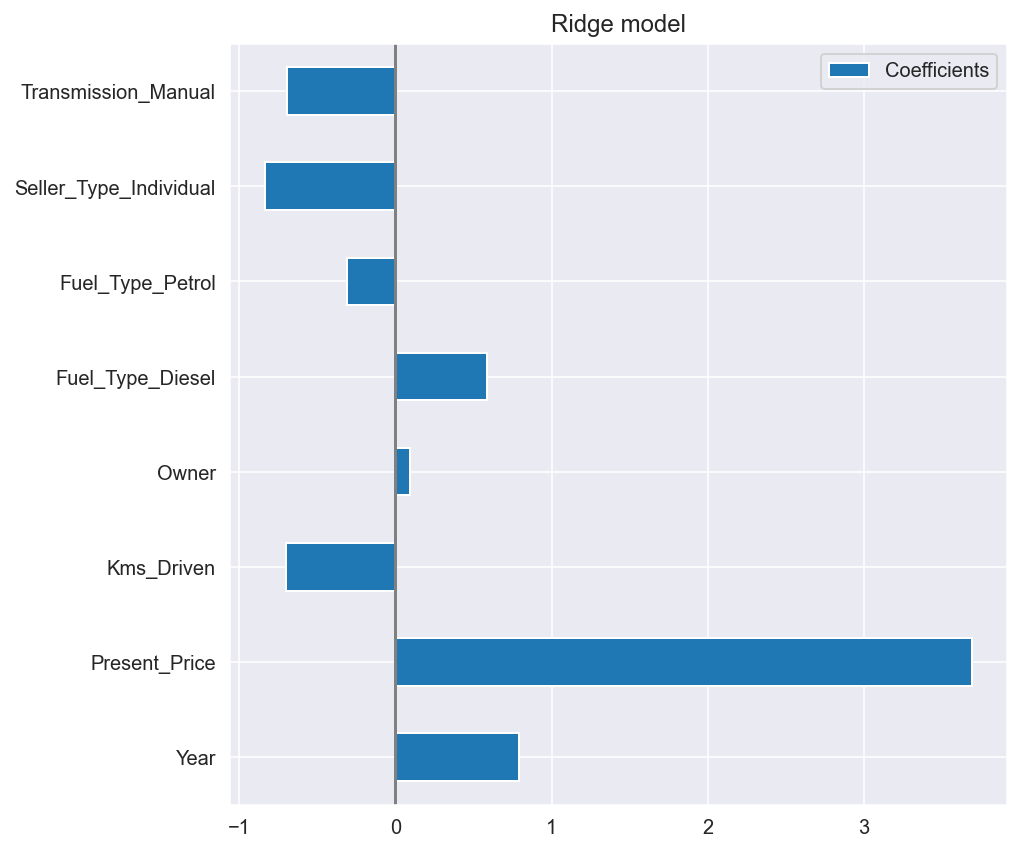

In [103]:
import matplotlib.pyplot as plt

coefs = pd.DataFrame(
   model.coef_,
   columns=['Coefficients'], index=X_train.columns
)

coefs.plot(kind='barh', figsize=(9, 7))
plt.title('Ridge model')
plt.axvline(x=0, color='.5')
plt.subplots_adjust(left=.3)

In [104]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()

model.fit(X_train, y_train)

print(f'model score on training data: {model.score(X_train, y_train)}')
print(f'model score on testing data: {model.score(X_test, y_test)}')



model score on training data: 0.9854484979605104
model score on testing data: 0.7266698205694652


In [105]:
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, rr.predict(X_test))))

Root Mean Squared Error: 1.829613699048511


In [106]:
print('r2_score:', metrics.r2_score(y_test, rr.predict(X_test)))

r2_score: 0.8211459976494975


# 2. Lasso Regression





Lasso regression, or the Least Absolute Shrinkage and Selection Operator, is also a modification of linear regression. In Lasso, the loss function is modified to minimize the complexity of the model by limiting the sum of the absolute values of the model coefficients (also called the l1-norm).

The loss function for Lasso Regression can be expressed as below:

Loss function = OLS + alpha * summation (absolute values of the magnitude of the coefficients)

We now ask whether the lasso can yield either a more accurate or a more interpretable model than ridge regression. In order to fit a lasso model, we'll use the Lasso() function; however, this time we'll need to include the argument max_iter = 10000. Other than that change, we proceed just as we did in fitting a ridge model:


In [107]:
from sklearn.linear_model import Lasso,LassoCV

In [108]:
lassoCV=LassoCV(alphas = alphas,normalize = True)

In [109]:
lassoCV.fit(X_train, y_train)
lassoCV.alpha_

0.005

In [110]:
LASSO = Lasso(alpha = lassoCV.alpha_, normalize = True)
LASSO.fit(X_train, y_train)

Lasso(alpha=0.005, normalize=True)

In [111]:
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, LASSO.predict(X_test))))

print('r2_score:', metrics.r2_score(y_test, LASSO.predict(X_test)))


Root Mean Squared Error: 1.8446017178038718
r2_score: 0.8182036858092544


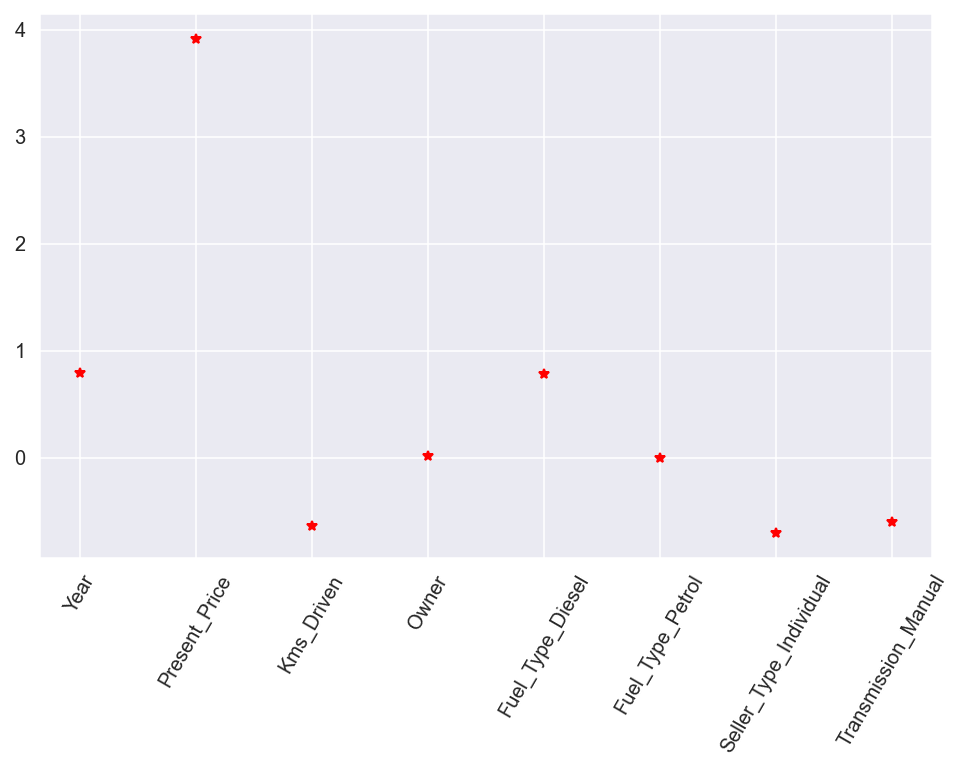

In [112]:
# Plot the coefficients
plt.figure(figsize=(8, 5))

colnames = X_train.columns

plt.plot(range(len(colnames)), LASSO.coef_, linestyle='none',marker='*',markersize=5,color='red')
plt.xticks(range(len(colnames)), colnames.values, rotation=60) 

plt.show()

Lasso did the great job among lasso and Ridge

We can see that the RMSE value for th3 lasso model is greater than the previous model. We can also see that the R2 value for this model is less than the previous model. This tells us that this model fits the data worse than the previous model.

## 3. ElasticNet Regression

ElasticNet combines the properties of both Ridge and Lasso regression. It works by penalizing the model using both the l2-norm and the l1-norm.

In [118]:
# Let's perform a cross-validation to find the best combination of alpha and l1_ratio
from sklearn.linear_model import ElasticNetCV, ElasticNet

# how much importance should be given to l1 reguralization
cv_model = ElasticNetCV(l1_ratio=[.1, .5, .7, .9, .95, .99, .995, 1],
    eps=0.001,
    n_alphas=100,
    alphas=None,
    fit_intercept=True,
    normalize=True,
    precompute='auto',
    max_iter=2000,
    tol=0.0001,
    cv=10,
    copy_X=True,
    verbose=0,
    n_jobs=-1,
    positive=False,
    random_state=None,
    selection='cyclic')

In [119]:
cv_model.fit(X_train, y_train)

ElasticNetCV(cv=10, l1_ratio=[0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 0.995, 1],
             max_iter=2000, n_jobs=-1, normalize=True)

In [120]:
print('Optimal alpha: %.8f'%cv_model.alpha_)
#The amount of penalization chosen by cross validation

print('Optimal l1_ratio: %.3f'%cv_model.l1_ratio_)
#The compromise between l1 and l2 penalization chosen by cross validation

print('Number of iterations %d'%cv_model.n_iter_)
#number of iterations run by the coordinate descent solver to reach the specified tolerance for the optimal al

Optimal alpha: 0.00102985
Optimal l1_ratio: 0.500
Number of iterations 25


In [121]:
# train model with best parameters from CV
elastic = ElasticNet(l1_ratio=cv_model.l1_ratio_, alpha = cv_model.alpha_, max_iter=cv_model.n_iter_, fit_intercept=True, normalize = True)
elastic.fit(X_train, y_train)

ElasticNet(alpha=0.0010298462050589538, max_iter=25, normalize=True)

In [122]:
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, elastic.predict(X_test))))

print('r2_score:', metrics.r2_score(y_test, elastic.predict(X_test)))

Root Mean Squared Error: 1.803971140067326
r2_score: 0.826124245608604




Out of the 3 regularization models the Elastic Net Model is performing the best on this dataset.
